<a href="https://colab.research.google.com/github/Elvira-Kadaub/PCA_PLS/blob/master/PLS_PCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.signal import savgol_filter 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
from google.colab import files
uploaded = files.upload()


Saving gasolineNIR.csv to gasolineNIR.csv


In [0]:
data = pd.read_csv('gasolineNIR.csv') # Import data from csv

#lab = pd.DataFrame.as_matrix(data)[:,1].astype('uint8') # The first column of the Data Frame contains the labels

# # Read the features (scans) and transform data from reflectance to absorbance 
# feat = np.log(1.0/pd.DataFrame.as_matrix(data)[:,2:].astype('float32')) 
# # Calculate first derivative applying a Savitzky-Golay filter
# dfeat = savgol_filter(feat, 25, polyorder = 5, deriv=1)

In [78]:
wl = np.arange(900,1702,2)  # wavelengths
len(wl)


401

In [0]:
X=data.iloc[:,1:]


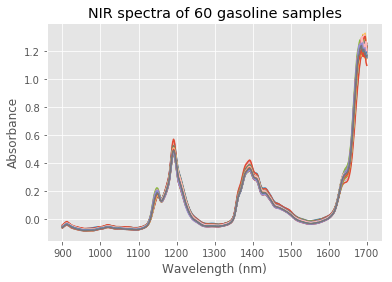

In [76]:
with plt.style.context(('ggplot')):
    plt.plot(wl, X.T) #.T- transpose 
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Absorbance')
    plt.title('NIR spectra of 60 gasoline samples')
    plt.show()
    

In [0]:
''' Step 1: PCA on input data'''

# Define the PCA object
pca = PCA()
feat=X;


# Preprocessing (1): first derivative
dfeat = savgol_filter(X, 25, polyorder = 5, deriv=1)

# # Preprocess (2) Standardize features by removing the mean and scaling to unit variance
# Xstd = StandardScaler().fit_transform(d1X[:,:])

# # Run PCA producing the reduced variable Xreg and select the first pc components
# Xreg = pca.fit_transform(Xstd)[:,:10]

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


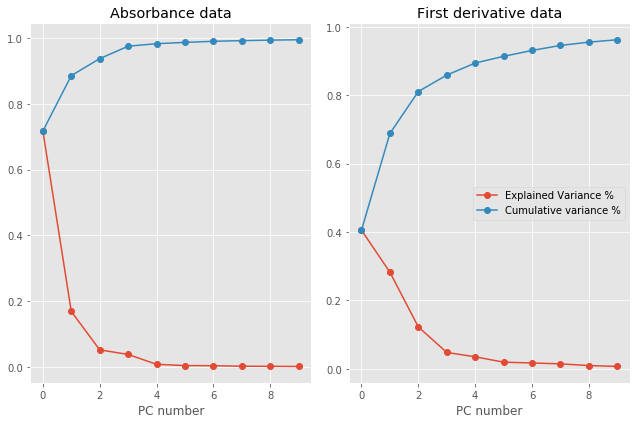

In [84]:
# Initialise
skpca1 = sk_pca(n_components=10)
skpca2 = sk_pca(n_components=10)

# Scale the features to have zero mean and standard devisation of 1
# This is important when correlating data with very different variances
nfeat1 = StandardScaler().fit_transform(feat)
nfeat2 = StandardScaler().fit_transform(dfeat)

# Fit the spectral data and extract the explained variance ratio
X1 = skpca1.fit(nfeat1)
expl_var_1 = X1.explained_variance_ratio_

# Fit the first data and extract the explained variance ratio
X2 = skpca2.fit(nfeat2)
expl_var_2 = X2.explained_variance_ratio_

# Plot data
with plt.style.context(('ggplot')):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,6))
    fig.set_tight_layout(True)

    ax1.plot(expl_var_1,'-o', label="Explained Variance %")
    ax1.plot(np.cumsum(expl_var_1),'-o', label = 'Cumulative variance %')
    ax1.set_xlabel("PC number")
    ax1.set_title('Absorbance data')
   
    ax2.plot(expl_var_2,'-o', label="Explained Variance %")
    ax2.plot(np.cumsum(expl_var_2),'-o', label = 'Cumulative variance %')
    ax2.set_xlabel("PC number") 
    ax2.set_title('First derivative data')

    plt.legend()
    plt.show()

In [0]:
skpca2 = sk_pca(n_components=4)

# Transform on the scaled features
Xt2 = skpca2.fit_transform(nfeat2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

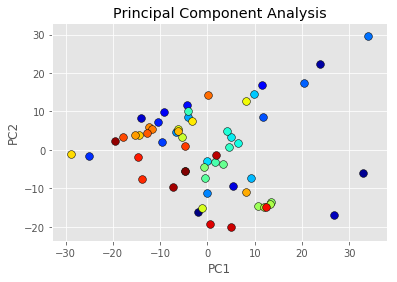

In [95]:
# Define the labels for the plot legend
# labplot = lab;

# Scatter plot
unique = list(set(lab))
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
with plt.style.context(('ggplot')):
    for i, u in enumerate(unique):
        xi = [Xt2[j,0] for j  in range(len(Xt2[:,0])) if lab[j] == u]
        yi = [Xt2[j,1] for j  in range(len(Xt2[:,1])) if lab[j] == u]
        plt.scatter(xi, yi, c=colors[i], s=60, edgecolors='k',label=str(u))

    plt.xlabel('PC1')
    plt.ylabel('PC2')
   # plt.legend(labplot,loc='lower right')
    plt.title('Principal Component Analysis')
plt.show()

In [0]:
lab=np.array(data.index)

In [0]:
unique = list(set(lab))
